<h1>
Predictors of Spending time on scial medias</h1>
<p>
    Golnaz Abrishami,Ada Niu, and Rashi Saxen <br>
    Professor Zarei<br>
    December 2018<br><p>

In [20]:
library(psych)
#library(pracma)
library(lattice)
library(ggplot2)
library(dplyr)
#library(scatterplot3d)
#library(cowplot)
library(knitr)
#library(kableExtra)
#library(car)

# Overview

Social Media has changed the way we communicate, in ways of creating a sense of urgency and a need to share, providing an inside perspective of faraway places, and making Digital messages more personal. Robert Lustig, professor at the University of Southern California and author of *The Hacking of the American Mind* said \"kids are definitely addicted. It’s not a drug, but it might as well be. It works the same way… it has the same results.\" Also, Companies, including Google and Apple, have said they will introduce features to help parents and kids monitor and manage their time online. We feel that looking into hours spent on social media is very fitting.

We conduct our own survey to collect the data we are interested. Convienence sampling method is conducted intend to generalize our sample to the population. For instance, posting surveys on facebook, and passing out to friends and families. Large Sample normal distribution can be applied since our sample size is greater than 30.

# 1. Data wrangling  

Reading the file and creating model for Responde variable which is the time that people spend on social media per day.


In [2]:
SM=read.csv("SM.csv")
str(SM)

'data.frame':	162 obs. of  8 variables:
 $ Timestamp     : Factor w/ 145 levels "11/27/2018 22:07",..: 1 2 2 3 3 4 5 6 7 8 ...
 $ age           : num  31 23 26 26 47 24 56 55 25 20 ...
 $ gender        : Factor w/ 3 levels "Female","Male",..: 1 2 1 1 2 1 2 1 2 2 ...
 $ occupation    : Factor w/ 7 levels "Business","Engineer",..: 2 2 2 5 5 1 3 7 2 2 ...
 $ marital_status: Factor w/ 2 levels "Married","Single": 1 2 2 2 1 2 1 1 2 2 ...
 $ education     : Factor w/ 6 levels "","Associate's Degree",..: 6 6 6 6 4 3 3 3 6 5 ...
 $ NSM           : num  2 3 3 4 0 5 3 1 2 2 ...
 $ HPD           : num  4 0.5 2 2 1 3 0.5 0.5 2 2 ...


### Deleting Nulls

In [3]:
dim(SM)
SM = SM[complete.cases(SM), ]
dim(SM)

[1] 162   8

[1] 155   8

### Ploting 


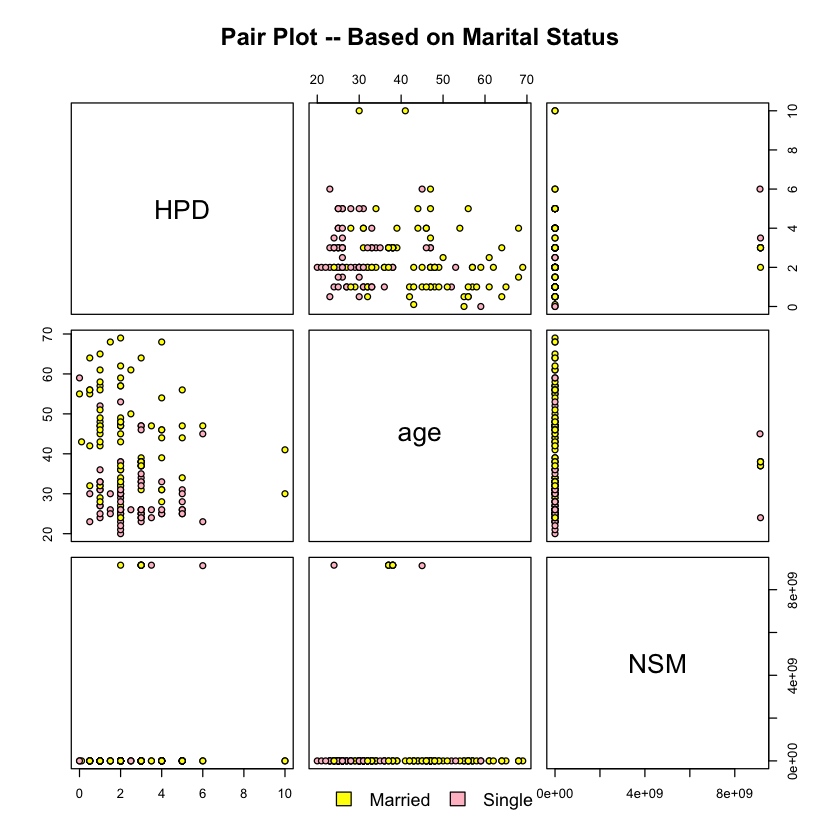

In [4]:
pairs(HPD~age+NSM,data=SM, main = "Pair Plot -- Based on Marital Status",
      pch = 21,bg = c("yellow","pink")[as.numeric(SM$marital_status)])
par(xpd=TRUE)
legend(0.37, 0.05, as.vector(unique(SM$marital_status)),  
       fill=c( "yellow","pink"),box.lty=0,cex=0.9,ncol=3)

Apperantly there is no linear relatioship, but we see potential outliers in Number of social media account that can impact our dataset.


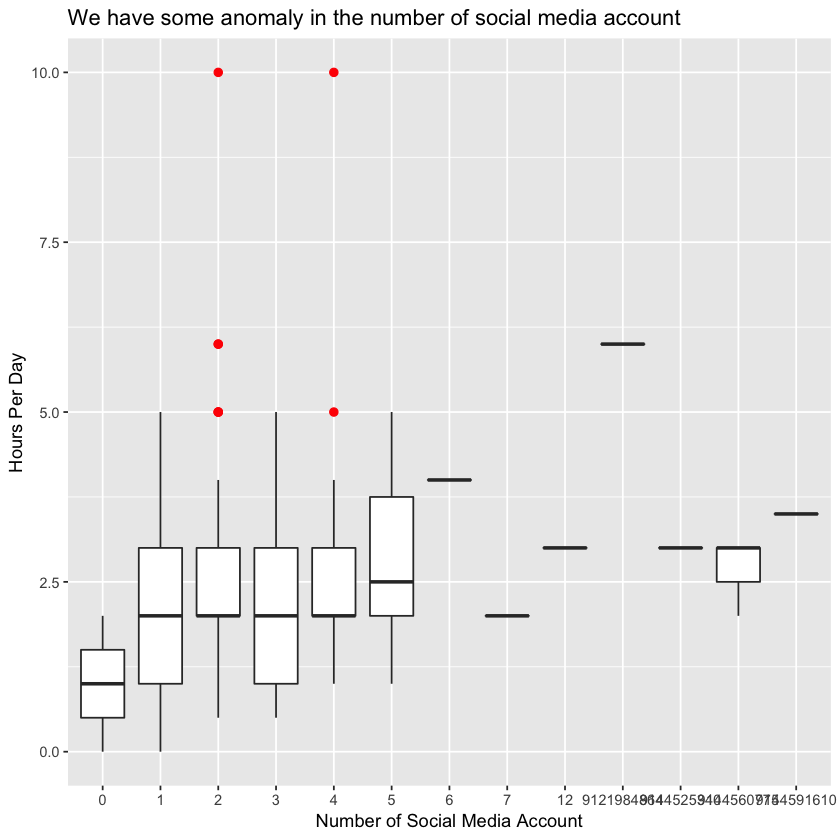

In [6]:
SM %>%
  ggplot(aes(factor(NSM),HPD))+
  geom_boxplot(outlier.colour="red",
                outlier.size=2) +
  xlab("Number of Social Media Account") +
  ylab("Hours Per Day") +
  ggtitle("We have some anomaly in the number of social media account")

After plotting a boxplot we see some anomaly in the number of social media accounts besides the potential outliers.

So, we checked our dataset and figured out that this anomaly derives from incorrect data, few people have written their phone numbers in the number of social media accounts column. We also notice a boxplot for having no social media accounts, which could be puzzling. The reason for this is because when we sent our survey out, we had only accounted for Facebook, Instagram, Pinterest, and Snapchat as our social media platforms, but to some of our responders count WhatsApp, WeChat, and Reddit as social media accounts so they entered 0 for the number of social media accounts we asked for and entered the number of hours they spend on social media using other platforms. Let's clean our data.

In [7]:
for(i in c(nrow(SM):1)){
  if(SM$NSM[i]>10 || SM$NSM[i]==0 || SM$age[i]>90){
    SM=SM[-c(i),]
  }
}
dim(SM)

[1] 142   8

# 2. Data Exploration 


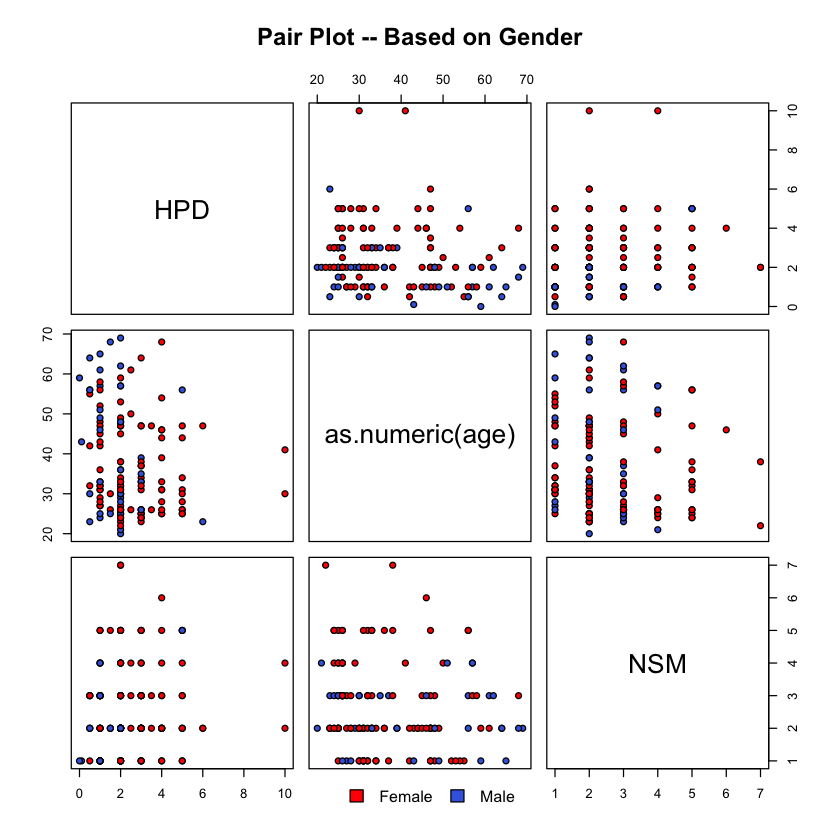

In [8]:
pairs(HPD~as.numeric(age)+NSM,data=SM, main = "Pair Plot -- Based on Gender",
      pch = 21,bg = c("red","royalblue","yellow")[as.numeric(SM$gender)])
 par(xpd=TRUE)
legend(0.39, 0.05, as.vector(unique(SM$gender)),  
              fill=c("red","royalblue","yellow"),box.lty=0,cex=0.8,ncol=3)


Now we have a better observations. Let's build a model. 

Let's take a look at our cleaner version of the boxplot 

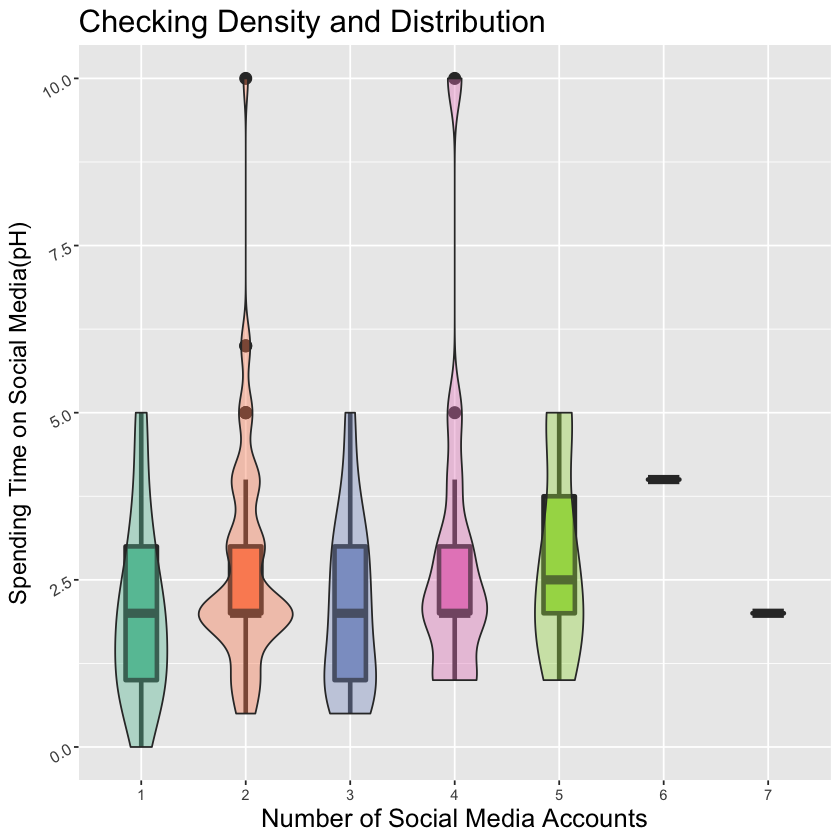

In [9]:
violin_plot <- ggplot(SM, aes(as.factor(NSM),HPD, fill=as.factor(NSM))) +
  geom_boxplot(width = 0.3, lwd = 1.3, outlier.size = 3) +
  geom_violin(alpha = 0.4) +
  theme(legend.position = "none")

quality_plt <- violin_plot +
  labs(title="Checking Density and Distribution",
       y="Spending Time on Social Media(pH)",
       x="Number of Social Media Accounts") +
  theme(plot.title= element_text(size=rel(1.7)),
        axis.title.x= element_text(size=rel(1.4)),
        axis.title.y= element_text(size=rel(1.3)),
        axis.text.y= element_text(angle=30, size = rel(1.1)))


quality_plt + scale_fill_brewer(palette = "Set2")


We have a Gaussian distribution for people who have only one social account, and people roughly spend two hours a day on social media.


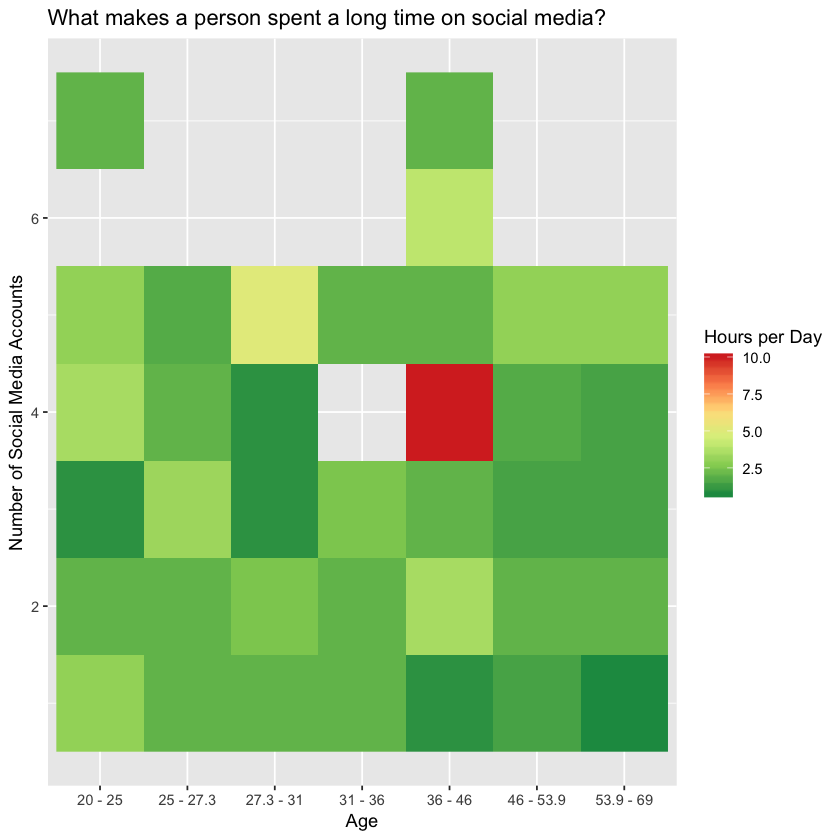

In [10]:
SM_M = mutate(SM, age = cut_number(SM$age,7))

SM_agg <- SM_M %>% group_by(NSM,age) %>%
  summarize(HPD=median(HPD))

myplt1 <- ggplot(SM_agg, aes( age ,NSM, fill= HPD))
(myplt1 +
  geom_raster() +
  scale_fill_distiller(palette = "RdYlGn") +
  scale_x_discrete("Age",
                   labels = c("20 - 25", "25 - 27.3", "27.3 - 31", "31 - 36",
                              "36 - 46", "46 - 53.9", "53.9 - 69")) +
  labs(title="What makes a person spent a long time on social media?",y="Number of Social Media Accounts",
       fill="Hours per Day")) 




# 3. Creating Models

## Model One

$H_0:\beta_1 = \beta_2 = 0\\H_a:\beta_1 = \beta_2 \neq 0$

- Responsive variable:<br>
1. hours spent on social media

- Predictor Variables:
1. age
2. number of social media accounts

In [12]:
m1= lm(HPD~NSM+as.numeric(age),data=SM)
summary(m1)


Call:
lm(formula = HPD ~ NSM + as.numeric(age), data = SM)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2955 -1.0753 -0.3311  0.5220  7.4797 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.98435    0.52412   5.694 7.09e-08 ***
NSM              0.09460    0.10118   0.935   0.3514    
as.numeric(age) -0.02055    0.01070  -1.921   0.0568 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.586 on 139 degrees of freedom
Multiple R-squared:  0.03535,	Adjusted R-squared:  0.02147 
F-statistic: 2.547 on 2 and 139 DF,  p-value: 0.08197


We see a pretty low R squared, so let's see we have some influential outliers. So, we run a cook distance to figure out whtere outliers are influentioal or no. 

Maybe it is time for us to try a new model with the other variables available to us. 

## Model Two

- Responsive variable:<br>
1. hours spent on social media

- Predictor Variables:
1. age
2. gender
3. occupation
4. marital_status
5. education


In [13]:
m2 <- lm(HPD~as.numeric(age) + NSM + as.factor(gender) + as.factor(occupation)+ as.factor(marital_status) + as.factor(education), data =SM)
summary(m2)


Call:
lm(formula = HPD ~ as.numeric(age) + NSM + as.factor(gender) + 
    as.factor(occupation) + as.factor(marital_status) + as.factor(education), 
    data = SM)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4981 -0.8968 -0.3412  0.7130  6.9245 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)                             3.52888    1.86445   1.893   0.0607 .
as.numeric(age)                        -0.02530    0.01393  -1.816   0.0717 .
NSM                                     0.08143    0.10552   0.772   0.4417  
as.factor(gender)Male                  -0.71654    0.31530  -2.273   0.0247 *
as.factor(occupation)Engineer          -0.17677    0.44046  -0.401   0.6889  
as.factor(occupation)Finance            0.02490    0.55402   0.045   0.9642  
as.factor(occupation)Marketing          0.22814    0.76291   0.299   0.7654  
as.factor(occupation)Medicine          -0.29475    0.51282  -0.575   0.5665  
as.factor(occupation)Sal

## Model Three

- Responsive variable:<br>
1. hours spent on social media

- Predictor Variables:
1. age
2. gender
3. number of social media accounts

Here, let's use only age, gender, and number of social media accounts. 



In [14]:
m3 <- lm(HPD~NSM+as.numeric(age)+as.factor(gender), data =SM)
summary(m3)




Call:
lm(formula = HPD ~ NSM + as.numeric(age) + as.factor(gender), 
    data = SM)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3254 -0.9853 -0.2973  0.8288  7.2634 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.18231    0.51749   6.149 7.89e-09 ***
NSM                    0.07456    0.09919   0.752   0.4535    
as.numeric(age)       -0.01814    0.01050  -1.729   0.0861 .  
as.factor(gender)Male -0.77811    0.28525  -2.728   0.0072 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.551 on 138 degrees of freedom
Multiple R-squared:  0.0847,	Adjusted R-squared:  0.06481 
F-statistic: 4.257 on 3 and 138 DF,  p-value: 0.00655


Using this model, we notice a slight jump in Rsquared, but also a very low p value. We can also notice that number of social media accounts, has a high p value, so it might be interesting to look at a model with just age and gender as the predictor variables. 

## Model Four

- Responsive variable:<br>
hours spent on social media

- Predictor Variables:
1. age
2. gender




In [15]:
m4 <- lm(HPD~ as.numeric(age)+as.factor(gender), data = SM) 
summary(m4)


Call:
lm(formula = HPD ~ as.numeric(age) + as.factor(gender), data = SM)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3064 -0.9209 -0.3103  0.8416  7.3653 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.41693    0.41215   8.291 8.64e-14 ***
as.numeric(age)       -0.01908    0.01041  -1.834  0.06886 .  
as.factor(gender)Male -0.79399    0.28402  -2.796  0.00592 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.548 on 139 degrees of freedom
Multiple R-squared:  0.08096,	Adjusted R-squared:  0.06773 
F-statistic: 6.122 on 2 and 139 DF,  p-value: 0.002831


Our R squared is still pretty low so let's check for any outliers, correlation between coefficients, and linear assumptions. 

# 4. Analyzing 

Checking outliers to see if they are influentioal 



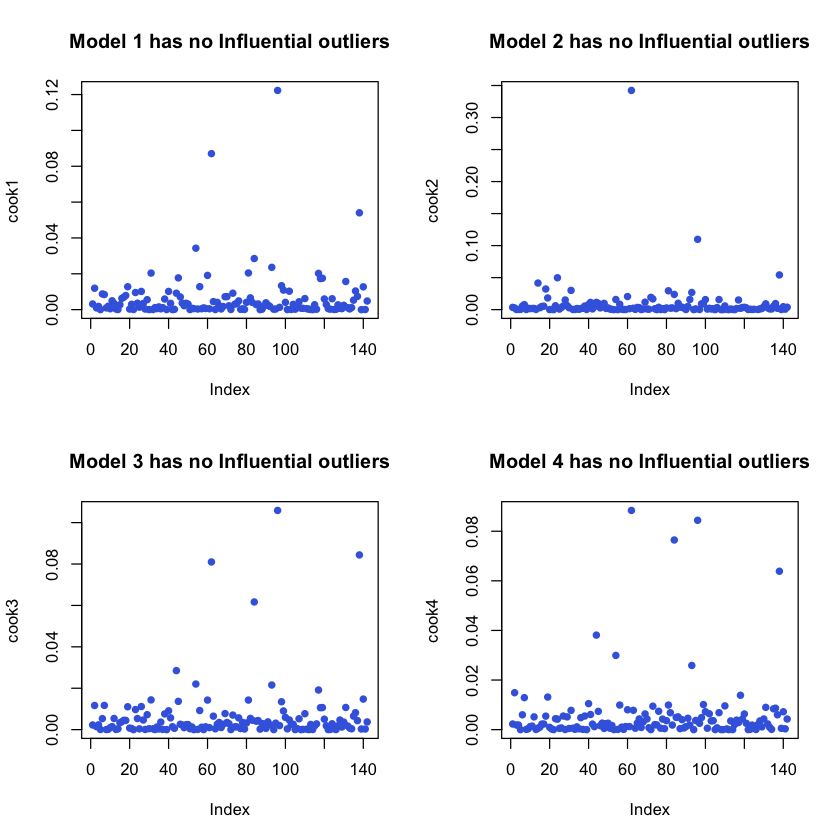

In [16]:
cook1=cooks.distance(m1)
cook2=cooks.distance(m2)
cook3=cooks.distance(m3)
cook4=cooks.distance(m4)

par(mfrow=c(2,2))
plot(cook1,pch=16,col="Royalblue",main="Model 1 has no Influential outliers")
plot(cook2,pch=16,col="Royalblue",main="Model 2 has no Influential outliers")
plot(cook3,pch=16,col="Royalblue",main="Model 3 has no Influential outliers")
plot(cook4,pch=16,col="Royalblue",main="Model 4 has no Influential outliers")




According to plot we do not have any observation with coock distance greater than one. So, none of the outliers are influential and we can keep them.

Let's see if we have a way of finding some correlation betweek coefficients, meaning that two predictor variables are correlated. Let's check the variance inflation factors for this two predictors.

Let's check for linear assumptions



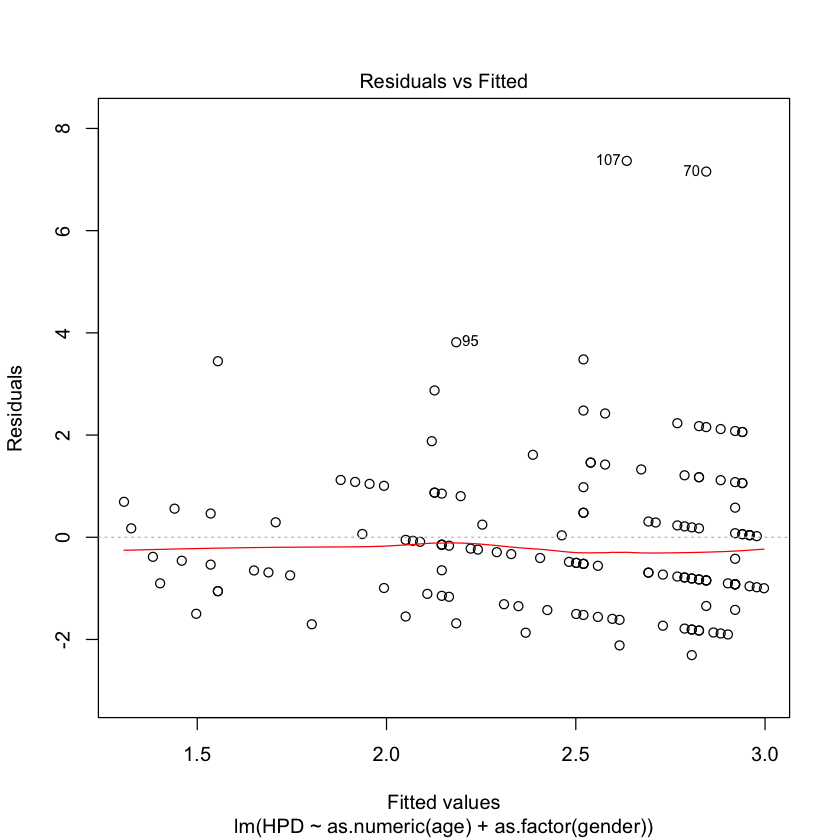

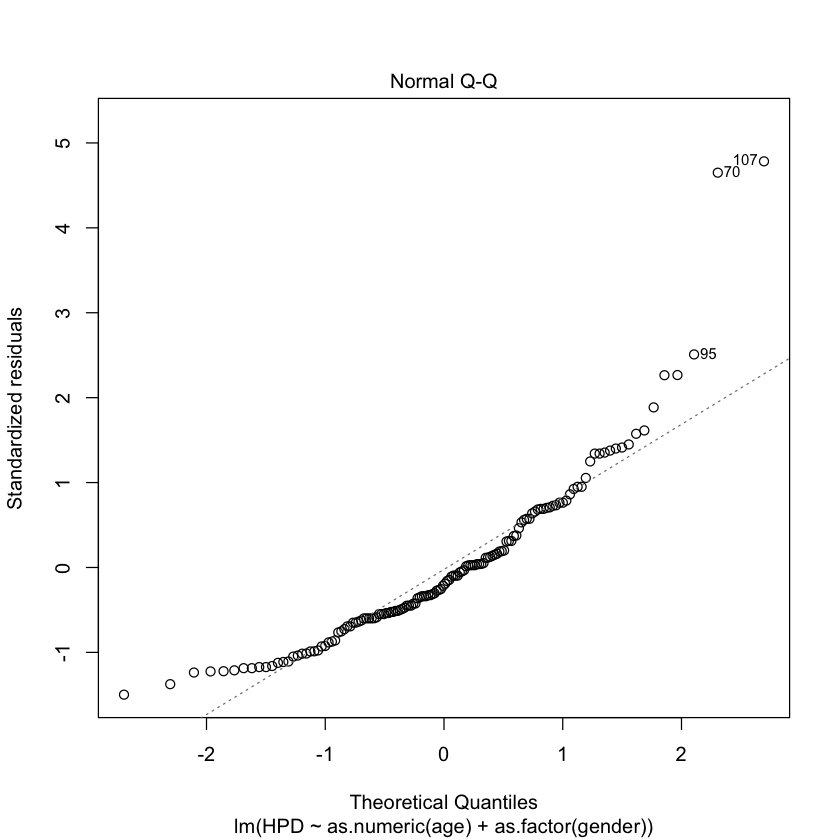

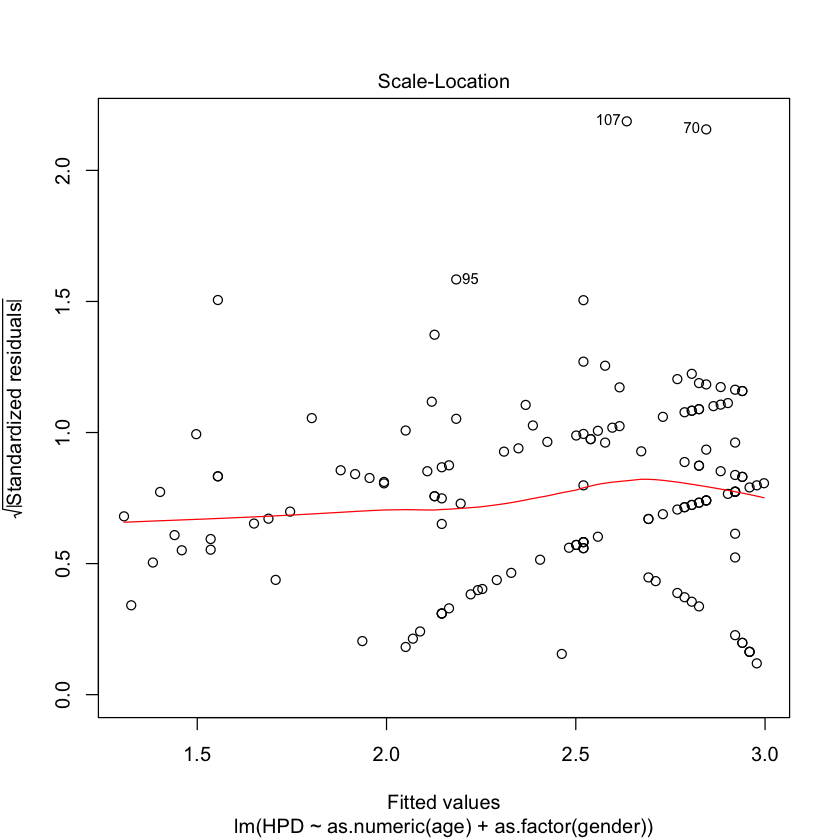

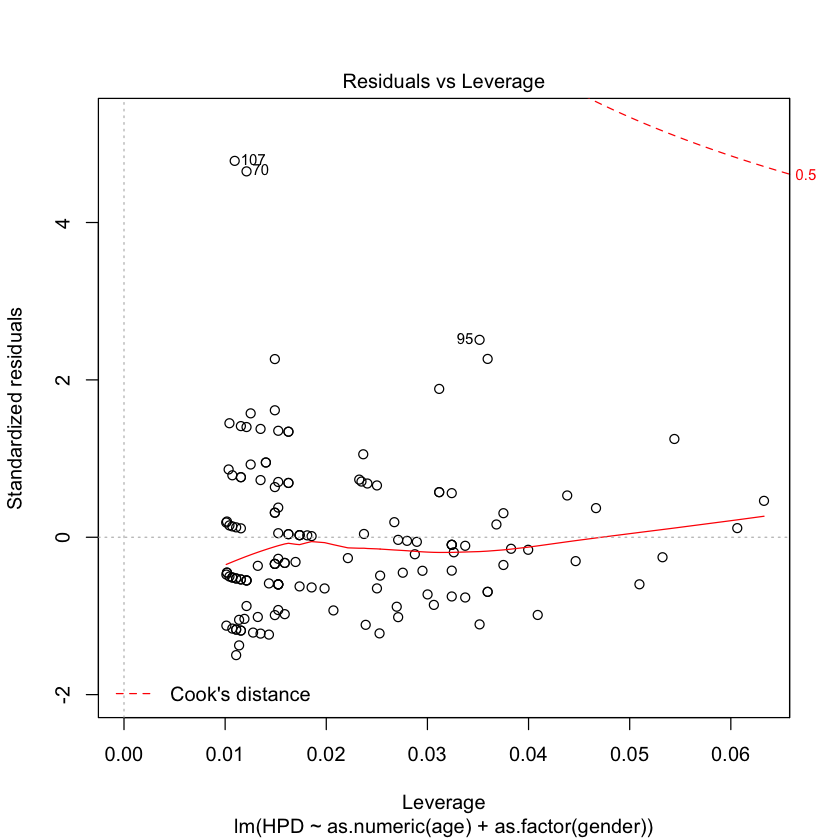

In [17]:
plot(m4)

We can see inequality of the variance from the Residual plot. 

We can also see from the NOrmal Q-Q plot does not follow a normal distribution. 

Let's check visually if there is any linear relationship between the predictor variables and response variable. 

In [18]:

HPD <- SM$HPD

age <- as.numeric(SM$age)

gender <- as.factor(SM$gender)

scatterplot3d(HPD,age,gender,  pch=16, highlight.3d=TRUE, main="3D Scatterplot")

ERROR: Error in scatterplot3d(HPD, age, gender, pch = 16, highlight.3d = TRUE, : could not find function "scatterplot3d"


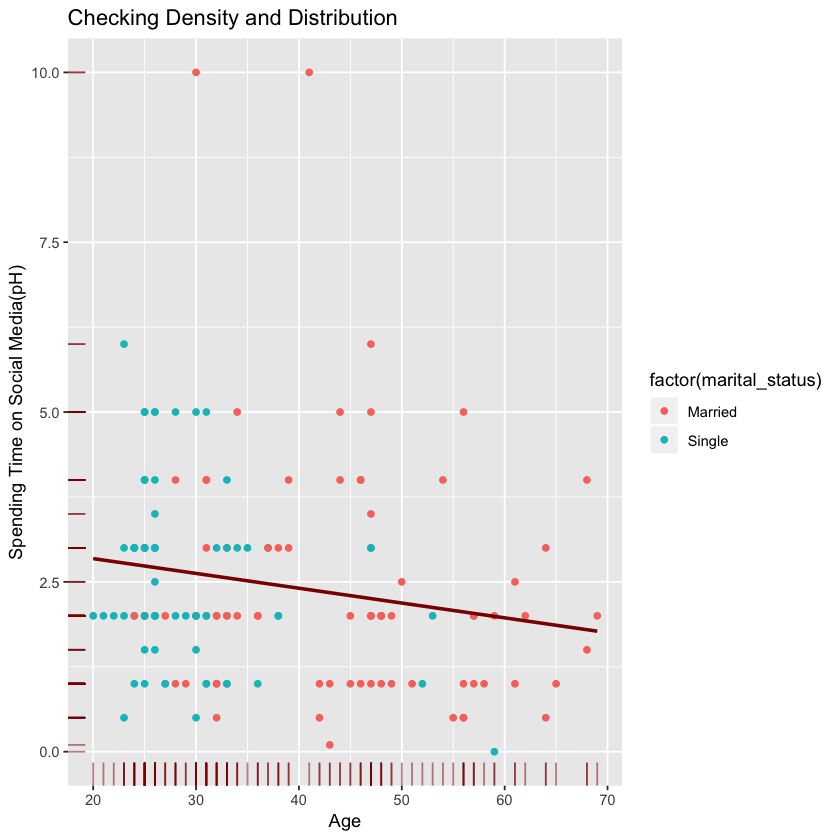

In [19]:
plt <- ggplot(SM, aes(age,HPD))
plt +
  geom_point(aes(color=factor(marital_status))) +
    geom_smooth(se=FALSE, color="darkred", method="lm") +
  labs(title="Checking Density and Distribution",
       y="Spending Time on Social Media(pH)",
       x="Age") +
    geom_rug(alpha=0.5, color="darkred")


# 5. Conclusion 

Given our p-value, we can say that Age and Number of Social Media Accounts, are good predictors of Hours Spend on Social Media, but we can also say that given our significantly low adjusted $R^{2}$, they are not very useful. Based on our $R^{2}$, we can say that only 3% of the variation in Hours Spent on Social Media is explained by Age and Numbe of Social Media Accounts.

Taken together, age and number of social media accounts are useful in predicting the time that a person spend in social medias per day. But model is not an accurate model to predict number of hours spent on social media as there is no linear relationship. We cannot ensure that the observed effect, is only caused by the variation in our predictor variables .


# 6. Research Limitations and Further Topics

1. We want to look into other methods besides linear regression.
2. We want to increase our data size. 
3. We want to look into more variables that might be more useful for the model:
    * Gender
    * Education
    * Occupation



